<a href="https://colab.research.google.com/github/PreranaKolambkar/SMS-Spam-Classification-using-NLP/blob/main/28_10_2024_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy

In [ ]:
!pip install wordcloud

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/data science /SMSSpamCollection',sep='\t',header=None,names=['label','msg'])

In [ ]:
df.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['len']=df['msg'].apply(len)

In [ ]:
df.head()

,label,msg,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# ham and spam has mssgs

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

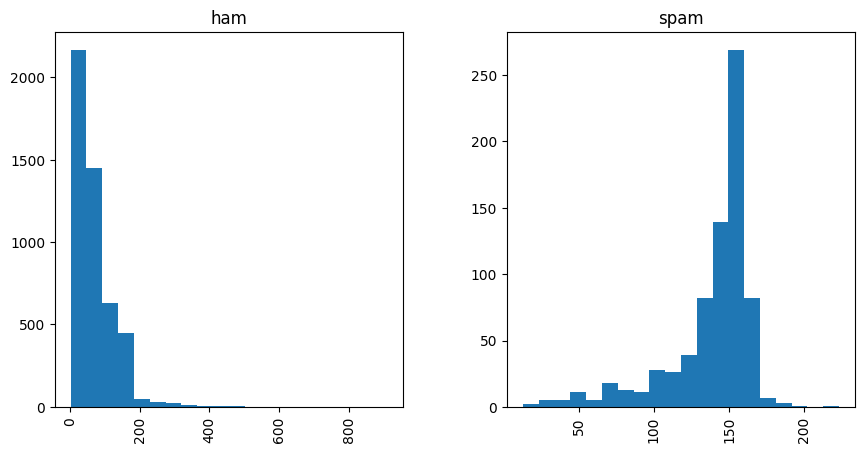

In [ ]:
df.hist('len',by='label',bins=20,figsize=(10,5)) # count of message

In [ ]:
# spam has more lengthy mssge bcoz x axis length keeps  on increasing


In [ ]:
df['len'].describe()

,len
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [ ]:
df[df['len']==910] # maximum mssg

,label,msg,len
1085,ham,For me the love should start with attraction.i...,910


In [ ]:
df[df['len']==910].iloc[0,1]  # to reag the message

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [ ]:
df[df['len']==10].iloc[0,1]

'Can a not?'

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [ ]:
sentence='this is data sence class started in august'

In [ ]:
doc=nlp(sentence)


In [ ]:
doc

this is data sence class started in august

In [ ]:
for i  in doc:
  print(i.text,i.pos_,spacy.explain(i.pos_),i.is_stop,i.is_punct,i.is_digit,i.is_currency,i.is_bracket)  # parts of speech

this PRON pronoun True False False False False
is AUX auxiliary True False False False False
data NOUN noun False False False False False
sence NOUN noun False False False False False
class NOUN noun False False False False False
started VERB verb False False False False False
in ADP adposition True False False False False
august PROPN proper noun False False False False False


In [ ]:
# check for stop word ,punctuation ,digit,brackets

In [ ]:
import string
string.punctuation  # to find how many punctaution there in english language

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')  # check for stop words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
from nltk.stem import PorterStemmer  #stemming

In [ ]:
stem=PorterStemmer()  # remove last few leeters

In [ ]:
stem.stem('running')

'run'

In [ ]:
from nltk.stem import WordNetLemmatizer  # root word

In [ ]:
lem=WordNetLemmatizer()

In [ ]:
lem.lemmatize('always',pos='v') # verb

'always'

In [ ]:
lem.lemmatize('running',pos='v')

'run'

In [ ]:
lem.lemmatize('better',pos='a')

'good'

In [ ]:
## tokenization

In [ ]:
sentence='this is data science class. The class started in august 2024'

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
print(word_tokenize(sentence))

['this', 'is', 'data', 'science', 'class', '.', 'The', 'class', 'started', 'in', 'august', '2024']


In [ ]:
print(sent_tokenize(sentence))  # after full stop it separtes sentence

['this is data science class.', 'The class started in august 2024']


**mssg sent by ham or spam?**

**1. Data cleaning**

In [ ]:
import re  # regular expression

In [ ]:
sent='hi,how are you?$,2024'

In [ ]:
re.findall('\w+',sent)  # remove non alphanumeric

['hi', 'how', 'are', 'you', '2024']

In [ ]:
' '.join(re.findall('\w+',sent))

'hi how are you 2024'

In [ ]:
def clean_words(text):
  text1=' '.join(re.findall('\w+',text))
  doc=nlp(text1)   # nlp has all spacy package
  clean_text=[token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_bracket and not token.is_digit and not token.is_currency and not token.is_space]
  return clean_text
  # first check token in doc for stopword,punctaution,bracket then apply lemmitization

In [ ]:
clean_words('this is  data science classes #$?.')

['data', 'science', 'class']

In [ ]:
# count vectorization

In [ ]:
corpus=['this is the data science class with SL',
        'AI is the next class'
        'and this is third class',
        'and this is forth class']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [ ]:
count=CountVectorizer(analyzer=clean_words)  # clean words is cleaning function

In [ ]:
x=count.fit_transform(corpus)

In [ ]:
print(count.get_feature_names_out())

['AI' 'SL' 'class' 'classand' 'datum' 'forth' 'science']


In [ ]:
x.toarray()

array([[0, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0]])

In [ ]:
tfidf=TfidfTransformer()

In [ ]:
a=tfidf.fit_transform(x) # output of count vector


In [ ]:
a.toarray()  # weightage

array([[0.        , 0.54645401, 0.32274454, 0.        , 0.54645401,
        0.        , 0.54645401],
       [0.65249088, 0.        , 0.38537163, 0.65249088, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.50854232, 0.        , 0.        ,
        0.861037  , 0.        ]])

In [ ]:
df

,label,msg,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [ ]:
count

CountVectorizer(analyzer=<function clean_words at 0x7ca6b83fa2a0>)

In [ ]:
x=count.fit_transform(df['msg'])

In [ ]:
a=tfidf.fit_transform(x)

In [ ]:
a.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
multi=MultinomialNB()

In [ ]:
multi.fit(a,df['label'])  # xtrain=a,ytrain=label only training validation

MultinomialNB()

In [ ]:
y_pred=multi.predict(a)

In [ ]:
y_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
accuracy_score(df['label'],y_pred)

0.9791816223977028

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df['msg'],df['label'],train_size=0.75,random_state=100)

In [ ]:
x_train.shape

(4179,)

In [ ]:
x_test.shape

(1393,)

In [ ]:
y_train.shape

(4179,)

In [ ]:
# pipleine all 4 steps included cleaning,vector,tfidf,algorithm

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline=Pipeline([('count',CountVectorizer(analyzer=clean_words)),('tfidf',TfidfTransformer()),('multi',MultinomialNB())])

In [ ]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('count',
                 CountVectorizer(analyzer=<function clean_words at 0x7ca6b83fa2a0>)),
                ('tfidf', TfidfTransformer()), ('multi', MultinomialNB())])

In [ ]:
y_pred=pipeline.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9676956209619526

In [ ]:
sentence

'this is data science class. The class started in august 2024'

**NER**

In [ ]:
sentence='this is data sence class started in august and iam staying near to tajmahal'

In [ ]:
doc=nlp(sentence)

In [ ]:
doc

this is data sence class started in august and iam staying near to tajmahal

In [ ]:
for token in doc.ents:
  print(token.text,token.label_,spacy.explain(token.label_),token.start_char,token.end_char) # label,exlanation,start and end

august DATE Absolute or relative dates or periods 36 42
iam staying PERSON People, including fictional 47 58


In [ ]:
spacy.displacy.render(doc,style='ent')

**text data visulaization(wordcloud)**

In [ ]:
import wordcloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
len((set(STOPWORDS)))

192

In [ ]:
sentence='this is data sence class started in august and iam staying near to tajmahal'

In [ ]:
wordcloud=WordCloud(width=1000,height=1000,background_color='black',colormap='cool').generate(sentence)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def visualize(wordcloud):
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.savefig('wordcloud.png')
  plt.show()


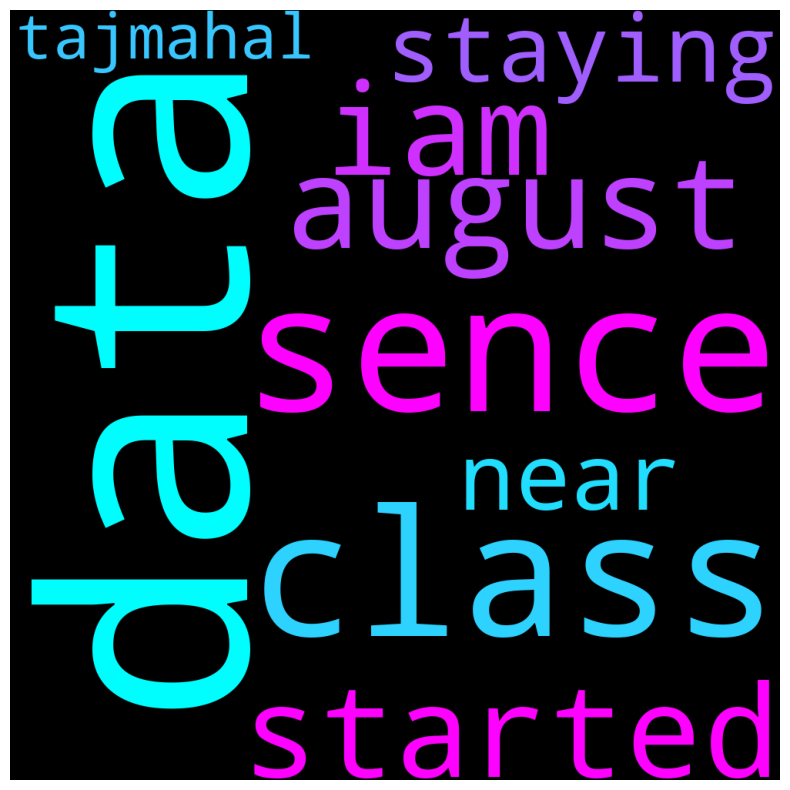

In [ ]:
visualize(wordcloud)

In [ ]:
stop=set(STOPWORDS)
stop=stop.update(['tajmahal'])  # if we dont want particular word

In [ ]:
wordcloud=WordCloud(width=1000,height=1000,background_color='black',colormap='cool',stopwords=stop).generate(sentence)

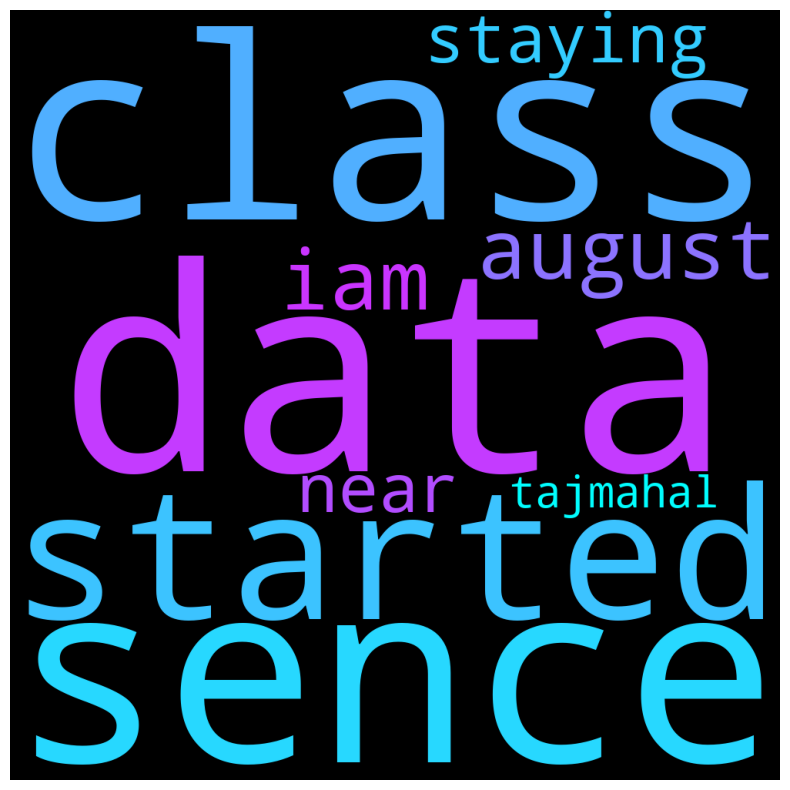

In [ ]:
visualize(wordcloud)  # not working